<a href="https://colab.research.google.com/github/Sanjeevnara/Deep-Learning/blob/master/Deep_learning_pre_course_assignemnt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First we load the Fashion MNIST dataset 

In [ ]:
# Load the libraries we will need 
import tensorflow as tf
import sklearn as sklearn
import matplotlib.pyplot as plt
import numpy as np
 

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Now explore the train and test data by checking the shape, type, some samples etc 
print(train_images.shape )
print(test_images.shape)

print(type(train_images))
print(type(test_images))




(60000, 28, 28)
(10000, 28, 28)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


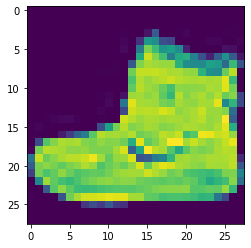

In [ ]:
plt.imshow(train_images[0])

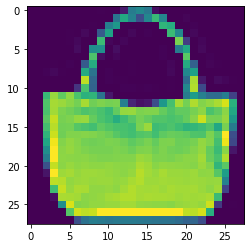

In [ ]:
plt.imshow(train_images[100])

In [ ]:
# Now we Train the svm classifier with the default images and compute different metrics: 

from sklearn import svm
# since we have the data in 3D array, lets first convert it to 2D 
train_data = np.reshape(train_images,(train_images.shape[0],train_images.shape[1]*train_images.shape[2]))
test_data  = np.reshape(test_images,(test_images.shape[0],test_images.shape[1]*test_images.shape[2]))

# This is taking long time to execute, lets try a shorter version of data 

train_data_short = train_data[0:20000]
train_labels_short = train_labels[0:20000]
clf_svm = svm.LinearSVC(random_state= 1111)

clf_svm.fit(train_data_short,train_labels_short)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1111, tol=0.0001,
          verbose=0)

In [ ]:
pred_labels = clf_svm.predict(test_data)

from sklearn.metrics import accuracy_score, average_precision_score, recall_score

acc_svm = accuracy_score(test_labels,pred_labels)
# Since we have multiclass data, it is not possible to use the average fundtions
# We have to train oneVsAll SVM classifier 
# precision_svm = average_precision_score(test_labels,pred_labels)
#recall_svm = recall_score(test_labels,pred_labels)
print('The accuracy of SVM classifier is ', acc_svm * 100 , '%')
#print(precision_svm)
#print(recall_svm)





The accuracy of SVM classifier is  78.42 %


# Lets train the same data with MLP
### I have kept most of the parameters default


In [ ]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(random_state= 1111, max_iter= 200)

clf_mlp.fit(train_data,train_labels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1111, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
# now we test the data and compute the accuracy for MLP 

pred_lab_mlp = clf_mlp.predict(test_data)
acc_mlp = accuracy_score(test_labels,pred_lab_mlp)
print('The accuracy of MLP classifier is ', acc_mlp * 100 , '%')


The accuracy of MLP classifier is  84.87 %


### The accuraacy with MLP default settings in 84 %, lets try to twaek some of the parameters and see how does this vary


In [ ]:
from sklearn.neural_network import MLPClassifier

clf_mlp_2 = MLPClassifier(random_state= 1111, max_iter= 500,hidden_layer_sizes= train_data.shape[1])

clf_mlp_2.fit(train_data,train_labels)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=784, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1111, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
pred_lab_mlp_2 = clf_mlp_2.predict(test_data)
acc_mlp_2 = accuracy_score(test_labels,pred_lab_mlp_2)
print('The accuracy of MLP classifier is ', acc_mlp_2 * 100 , '%')

# this improved the accuracy by 1 % 

The accuracy of MLP classifier is  85.84 %


### Lets test the naive bayes classifier 

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()
clf_nb.fit(train_data,train_labels)

pred_lab_nb = clf_nb.predict(test_data)
acc_nb = accuracy_score(test_labels,pred_lab_nb)
print('The accuracy of Naive Bayes classifier is ', acc_nb * 100 , '%')


The accuracy of Naive Bayes classifier is  58.56 %


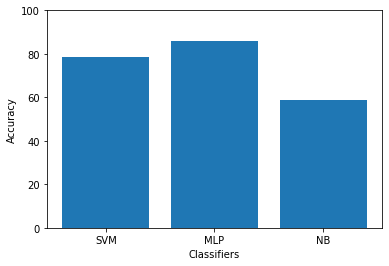

In [ ]:
 # Here we go for the plot 
classifiers = ['SVM', 'MLP', 'NB']
Accuracies = [acc_svm * 100 , acc_mlp_2 * 100 , acc_nb * 100] 
#print(Accuracies)

plt.bar(classifiers,Accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.ylim(0,100)
plt.show()
